# Preface


In [1]:
# IMPORTS
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# DATA IMPORT
dt_students = pd.read_excel("../data/students.xls")
dt_iris = pd.read_csv("../data/iris.csv", sep=";", decimal=b",", index_col=0)

---
# Task 1.1
What is the most common mark that has been given in FSS2010?<br>
(Hint: To  find the answer  filter the examples and draw a histogram afterward.)

In [2]:
# Filter by 'Semester' and count 'Mark'
marks_in_fss2010 = dt_students.loc[dt_students.Semester == "FSS2010"].Mark
most_common_mark_sets = Counter(marks_in_fss2010).most_common()
print("In FSS2010 the most common mark was {} with {} occurences."\
     .format(most_common_mark_sets[0][0], most_common_mark_sets[0][1]))

In FSS2010 the most common mark was 2.0 with 7 occurences.


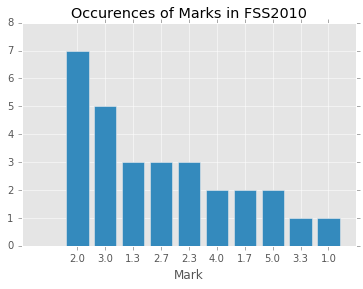

In [3]:
# Sort dict by value & transpose to extract keys at index [0] and values at index [1]
sorted_cnt_marks_in_fss2010 = np.array(most_common_mark_sets).T
plt.bar(range(len(sorted_cnt_marks_in_fss2010[1])), sorted_cnt_marks_in_fss2010[1], align="center")
plt.xticks(range(len(sorted_cnt_marks_in_fss2010[1])), sorted_cnt_marks_in_fss2010[0])
plt.xlabel("Mark")
plt.ylim((0,8))
plt.title("Occurences of Marks in FSS2010")
plt.show()

---
# Task 1.2
Is there a correlation between the mark and the number of attended classes? Please determine the answer visually using a scatter plot.

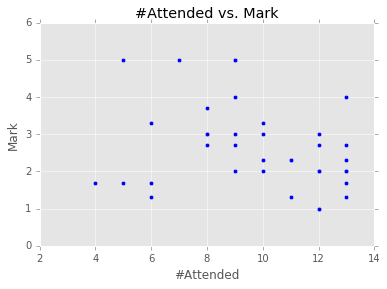

In [4]:
plt.scatter(dt_students["Attended"], dt_students["Mark"])
plt.xlabel("#Attended")
plt.ylabel("Mark")
plt.title("#Attended vs. Mark")
plt.show()

---
# Task 1.3
Does this correlation between the number of attended classes and the  final grading hold for all students?<br>(Hint: Find the answer by aggregating the examples by student and use a scatter chart afterwards.)

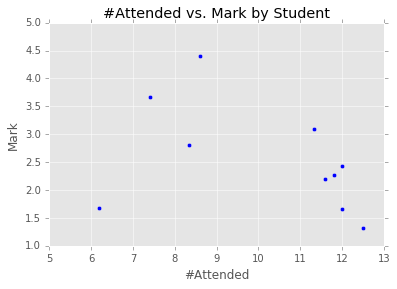

In [5]:
mean_mark_attended_by_student = dt_students.groupby("Name")[["Mark", "Attended"]].agg(np.mean)
plt.scatter(mean_mark_attended_by_student["Attended"], mean_mark_attended_by_student["Mark"])
plt.xlabel("#Attended")
plt.ylabel("Mark")
plt.title("#Attended vs. Mark by Student")
plt.show()

 ---
# Task 1.4
Using visualization techniques,  find out which attribute combinations and (approximate) value ranges determine the type of Iris  flower?

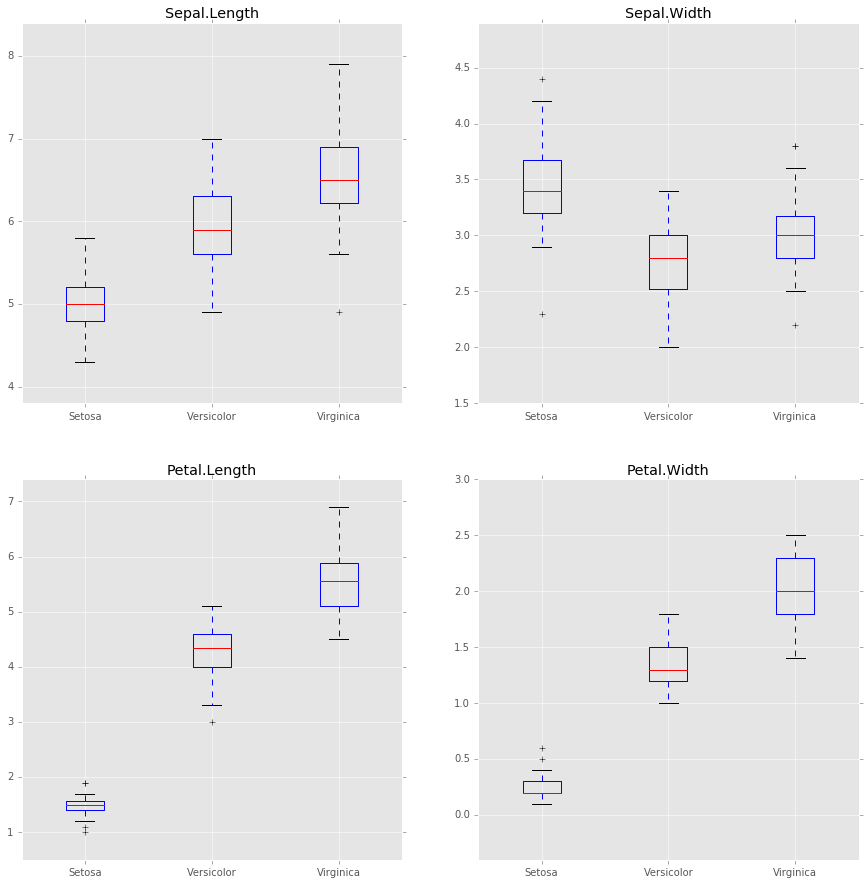

In [6]:
# Set up the plots
fig, axes = plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(15)
# extract class masks
mask_set, mask_ver, mask_vir =\
dt_iris["Species"] == "setosa",\
dt_iris["Species"] == "versicolor",\
dt_iris["Species"] == "virginica"
# create the plots
for n in range(axes.size):
    i = n//axes.shape[1]
    j = n%axes.shape[1]
    column = dt_iris.columns[n]
    data = [dt_iris.ix[mask_set, column], dt_iris.ix[mask_ver, column], dt_iris.ix[mask_vir, column]]
    axes[i, j].boxplot(data)
    axes[i, j].set_title(column)
    axes[i, j].set_ylim((np.min(data)-0.5,np.max(data)+0.5))
    axes[i, j].set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])

### Kommentar:
Wie in den unteren beiden Plots zu sehen ist, lässt sich die Klasse `setosa` durch die Parameter(kombination) von `petal length` und `petal width` eindeutig von den anderen beiden Klassen unterscheiden (bzw. ist von den anderen beiden Klassen linear trennbar).<br><br>
Die Klassen `versicolor` und `virginica` besitzen sich überschneidende value ranges in allen vie Parametern, wodurch diese nicht einfach linear trennbar sind.

---
# Task 1.5
What are the average values for each attribute for each Iris type?

In [12]:
dt_iris.groupby("Species")[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].agg(np.mean)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
